# Maze generation using recursive backtracker

In [5]:
import time

import numpy as np
import matplotlib.pyplot as pyplot
from matplotlib import colors
from numpy.random import randint, shuffle, seed

The following maze generation is of passage carver type i.e. it starts with filled space and carves passage.

In [6]:
def render(maze, shape, colored_pillars=False):
    """Prepares maze with walls
    """
    # corner pillars between adjacent rooms
    if colored_pillars:
        for i in range(1, shape[0]-1, 2):
            for j in range(1, shape[1]-1, 2):
                maze[i, j] = 3
    # build some walls
    maze = np.insert(maze, shape[1], 1, axis=1)
    maze = np.insert(maze, 0, 1, axis=1)
    maze = np.insert(maze, shape[0], np.ones(shape[1]+2), axis=0)
    maze = np.insert(maze, 0, np.ones(shape[1]+2), axis=0)
    return maze
    

def generate_maze(width=100, height=50):
    """Used for generating mazes
    Employs Recursive backtracking - randomized dfs
    
    Since uses recursion backtracking is done through implicit stack
    1. set current point as visited
    2. while there are unvisited neighbours
    3. pick one at random mark as visited
    4. carve a passage between current and picked neighbour
    5. repeat all steps with picked neighbour
    """
    seed(int(time.time()))
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1) # only odd shapes
    maze = np.ones(shape)
    while True: # need a random starting point with even coord
        x = randint(0, width)
        y = randint(0, height)
        if x % 2 == 0 and y % 2 == 0: break
    def visit(x, y):
        maze[y, x] = 0 # mark visited - remove block
        neighbours = [(x+2, y), (x-2, y), (x, y-2), (x, y+2)]
        shuffle(neighbours)
        for nx, ny in neighbours:
            if (0 <= nx <= shape[1] - 1) and (0 <= ny <= shape[0] - 1) and maze[ny, nx] == 1:
                maze[ny, nx] = 0 # marking neighbour as visited and carve block
                # carve passage between neighbour and current cell
                maze[ny + (y - ny) // 2, nx + (x - nx) // 2] = 0
                visit(nx, ny) # choosing neighbour as current cell and explore
    visit(x, y) # starting cell
    return maze, shape

Code to show generate maze in notebook using matplotlib

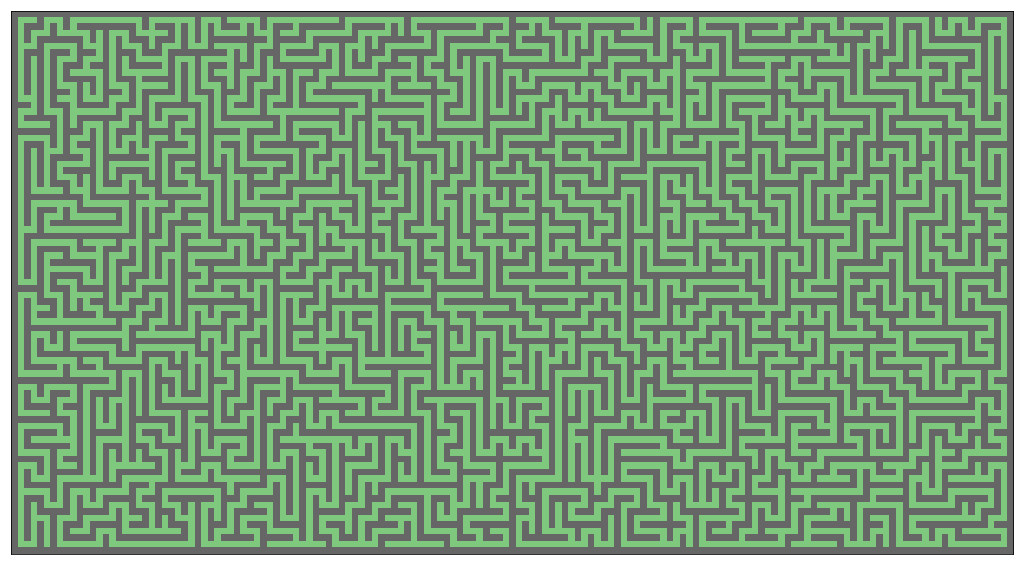

In [7]:
%matplotlib inline
maze, shape = generate_maze(150, 80)
for_render = render(maze, shape)
pyplot.figure(figsize=(20, 10))
pyplot.imshow(for_render, cmap=pyplot.get_cmap('Accent'), interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()